In [ ]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.9 MB/s eta 0:00:00


# Importar Bibliotecas necessárias

In [ ]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Criar função de transferência em malha aberta

In [ ]:
R=20.0e3; C=10.0e-6; tau=R*C; Tsim=1;
numerador = [1/tau]; denominador =[1.,1/tau] #Cria os vetores que serão polinômios
P_s = ctl.tf(numerador, denominador)         #Usa os vetores para criar P_s
print('FT em malha aberta = ', P_s)          #Mostra a FTMA

FT em malha aberta =  <TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  5
-----
s + 5



# Criar a função de transferência do controlador



In [ ]:
C_s = ctl.tf([3.],[1.])
#print('FT do controlador = ', C_s)

# Cria a função de Transferência da Realimentação (Sensor)

In [ ]:
H_s = ctl.tf([1.],[1.])
#print('FT do controlador = ', H_s)

# Função de transferência de malha fechada

In [ ]:
#G1_s = (C_s*P_s)/(1+C_s*P_s*H_s)
G_s = ctl.series(C_s, P_s);
G1_s = ctl.feedback(G_s, H_s, sign = -1);
print('FT em malha fechada = ', G1_s)

FT em malha fechada =  <TransferFunction>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  15
------
s + 20



# Calcular a resposta ao degrau

In [ ]:
T_mf, yout_mf = ctl.step_response(G1_s, Tsim)  # Calcula a resposta ao degrau (step) para Tsim e G1_s

# Calcula um degrau unitário

In [ ]:
T2 = np.linspace(-0.2, Tsim, 1000)
degrau = np.ones_like(T2)
degrau[T2 < 0] = 0;

# Plotar resultados

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

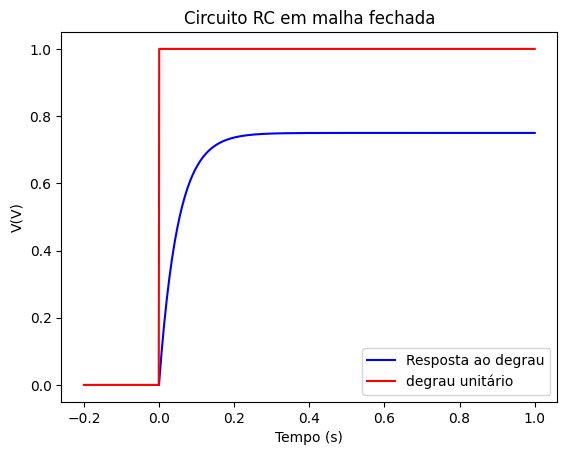

In [ ]:
plt.plot(T_mf, yout_mf, 'b-')
plt.plot(T2, degrau, 'r-')
plt.ylabel('V(V)'); plt.xlabel('Tempo (s)')
plt.legend(['Resposta ao degrau','degrau unitário'])
plt.title('Circuito RC em malha fechada')
plt.grid